QuantProgram from Youtube

Jim Simons Trading Secrets 1.2 SIMULATED Data Generation

In [21]:
import yfinance as yf
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

# Define the ticker symbol
ticker_symbol = 'SPY'

# Download historical data from Yahoo Finance
data = yf.download(ticker_symbol, start = '2008-01-01', end = '2011-01-01')

# Select only the 'Close' prices
close_prices = data['Close']

ret = np.log(1+close_prices.pct_change())
# Convert the Series to a DataFrame
df = pd.DataFrame(close_prices)


/var/folders/31/b1v52j156gbfz83pmrnth3jc0000gn/T/ipykernel_71315/2397415974.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
[*********************100%%**********************]  1 of 1 completed


In [22]:
# Print the DataFrame
print(df)

                 Close
Date                  
2008-01-02  144.929993
2008-01-03  144.860001
2008-01-04  141.309998
2008-01-07  141.190002
2008-01-08  138.910004
...                ...
2010-12-27  125.650002
2010-12-28  125.830002
2010-12-29  125.919998
2010-12-30  125.720001
2010-12-31  125.750000

[757 rows x 1 columns]


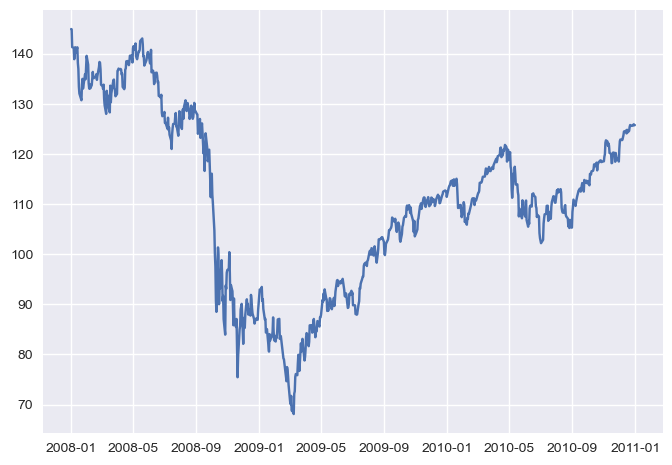

In [23]:
plt.plot(df)

In [24]:
ret

Date
2008-01-02         NaN
2008-01-03   -0.000483
2008-01-04   -0.024812
2008-01-07   -0.000850
2008-01-08   -0.016280
                ...   
2010-12-27    0.000398
2010-12-28    0.001432
2010-12-29    0.000715
2010-12-30   -0.001590
2010-12-31    0.000239
Name: Close, Length: 757, dtype: float64

In [25]:
mean = ret.mean()
std = ret.std()

# Print the mean and variance
print("Mean: ")
print(mean)
print("STD: ")
print(std)


Mean: 
-0.00018777117423058844
STD: 
0.019022013935020562


In [26]:
ret.shape[0]

757

In [27]:
simulated_data = np.random.normal(mean,std,ret.shape[0])

In [28]:
starting_stock_price = 400
sim_stock_price = starting_stock_price*(simulated_data+1).cumprod()

In [29]:
sim_stock_price = pd.DataFrame(sim_stock_price)

In [30]:
sim_stock_price

,0
0,385.612629
1,384.796421
2,375.018409
3,367.283916
4,359.452223
...,...
752,575.972404
753,561.347550
754,554.970228
755,569.867964


In [31]:
sim_stock_price

,0
0,385.612629
1,384.796421
2,375.018409
3,367.283916
4,359.452223
...,...
752,575.972404
753,561.347550
754,554.970228
755,569.867964


In [32]:
df

,Close
Date,
2008-01-02,144.929993
2008-01-03,144.860001
2008-01-04,141.309998
2008-01-07,141.190002
2008-01-08,138.910004
...,...
2010-12-27,125.650002
2010-12-28,125.830002
2010-12-29,125.919998


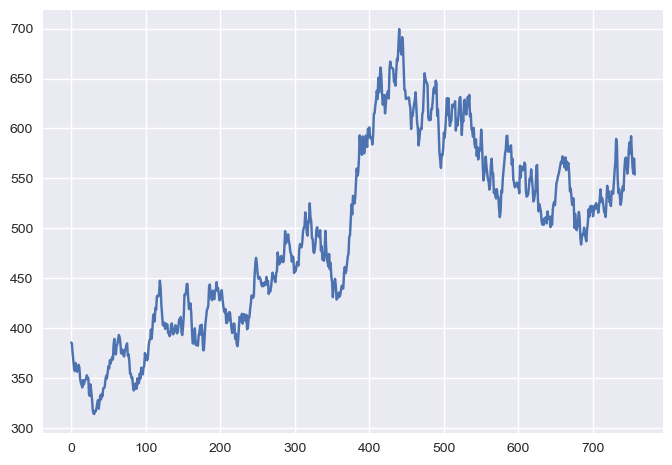

In [33]:
plt.plot(sim_stock_price)

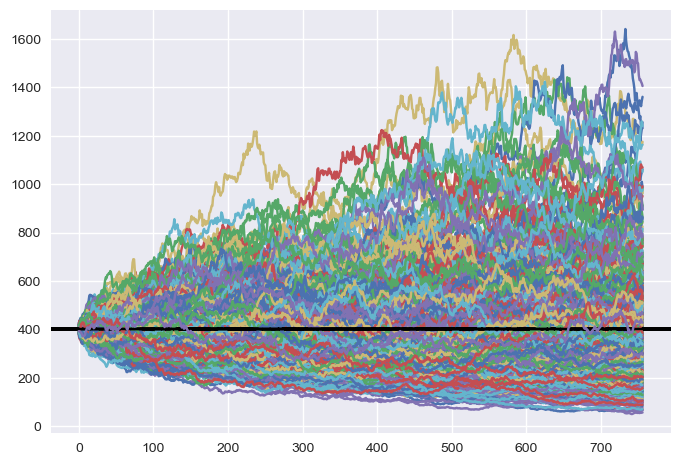

In [34]:
simulations_mc = []
for i in range(1000):
    simulated_data = np.random.normal(mean,std,ret.shape[0])
    starting_stock_price = 400
    sim_stock_price = starting_stock_price*(simulated_data+1).cumprod()
    plt.axhline(starting_stock_price,c='k')
    plt.plot(sim_stock_price)
    df_mc = pd.DataFrame(sim_stock_price, columns = ['Price'])
    simulations_mc.append(df_mc)

In [35]:
simulations_mc[3]

,Price
0,403.174268
1,402.707140
2,404.760826
3,411.134253
4,414.899674
...,...
752,435.351053
753,428.588726
754,426.299717
755,427.155383


In [36]:
# Monte Carlo Models

# Assumptions of Geometric Brownian Motion(Constant mean and Variance)

# X(t) = X(0) * e^()
#Assumes logarithmic returns of the asset follow a normal distribution and asset's price evolves over time.

#Strengths and Weaknesses

#Expected returns, volatility, scenarios

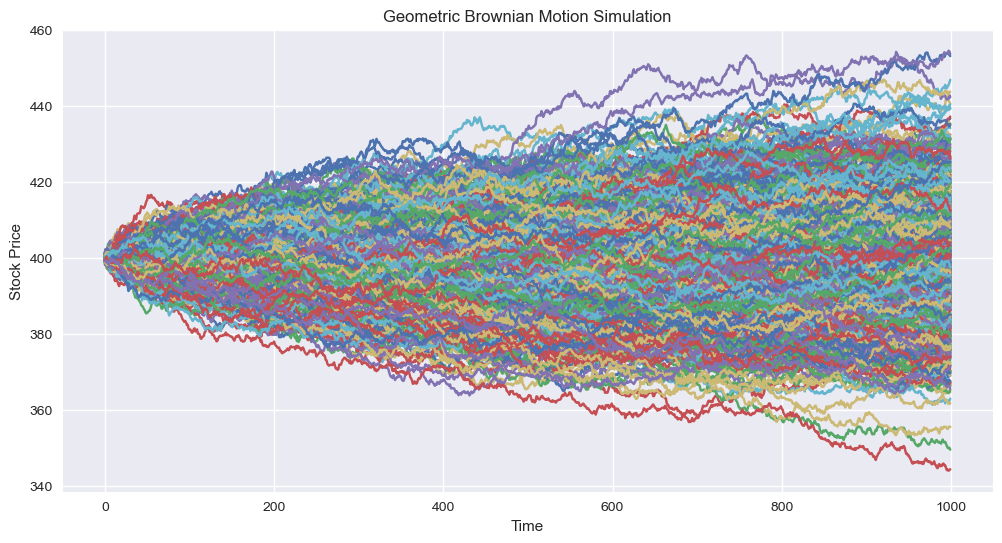

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# parameters

mu = mean
n = 1000 # Number of intervals
T = 4 # Time in years
M = 1000 # Number of simulations
S0 = 400 # Initial stock price
sigma = std # Volatility

# Calculate each time step
dt = T / n

# Simulation using numpy arrays
np.random.seed(42)
St = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size = (M, n)).T
)

 # Multiply through by S0 and return the cumulative product of elements along a given simulation path (axis = 0)
St = S0 * St.cumprod(axis = 0)

#Store simulation data in separate dataframes
simulations_gbm = []
for i in range(M):
    df = pd.DataFrame({"Stock Price": St[:,i]})
    simulations_gbm.append(df)

#Plot the simulated GBM realizations
plt.figure(figsize=(12,6))
for i in range(M):
    plt.plot(simulations_gbm[i]["Stock Price"])

plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Geometric Brownian Motion Simulation")
plt.show()

In [38]:
simulations_gbm[4]

,Stock Price
0,399.584093
1,399.568504
2,399.576576
3,399.803251
4,399.145762
...,...
995,374.714323
996,375.034613
997,376.441200
998,376.806766


In [39]:
# Heston Model

# GBM doesn't capture volatility component

# Volatility is not constant, mean reverting

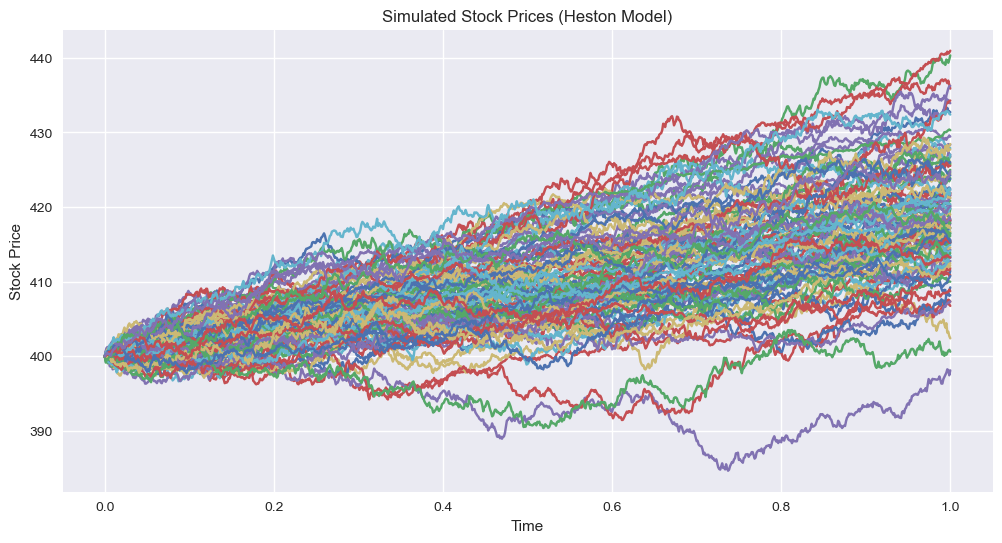

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Define mean and standard deviation of returns

#Calculate parameters for the Heston model
kappa = 2
theta = std ** 2 # Long-term average variance
sigma = std # Volatility of volatility
rho = -0.5 # Correlation between the stock price and its volatility

# Heston model parameters
S0 = 400 # Initial stock price
r = 0.05 # Risk-free interest rate
T = 1 # Time to maturity (in years)
N = 860 # Number of time steps
dt = T / N # Time increment
num_simulations = 100 # Number of simulations

# Simulate stock prices using the Heston model
#np.random.seed(42)
simulations_hm = []

plt.figure(figsize = (12,6))

for i in range(num_simulations):
    V = np.zeros(N+1)
    V[0] = theta

    for t in range(1, N+1):
        # dz1 used to model the randomness or noise in the volatility process.
        dZ1 = np.random.normal(0, np.sqrt(dt))
        # generated to introduce correlation between the stock price and its volatility
        dZ2 = rho * dZ1 + np.sqrt(1 - rho**2) * np.random.normal(0, np.sqrt(dt))
        # generated to introduce correlation between the stock price and its volatility. mean reversion
        V[t] = V[t-1] + kappa * (theta - V[t-1]) * dt + sigma * np.sqrt(V[t-1]) * dZ1

    S = np.zeros(N+1)
    S[0] = S0

    for t in range(1, N+1):
        dW = np.random.normal(0, np.sqrt(dt))
        S[t] = S[t-1] * np.exp((r - 0.5 * V[t]) * dt + np.sqrt(V[t]) * dW)

    df_heston = pd.DataFrame(S, columns = ['Price'])
    simulations_hm.append(df_heston)

    # Plot the simulated stock prices
    plt.plot(np.linspace(0, T, N+1), S)

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Simulated Stock Prices (Heston Model)')
plt.show()
